In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
%matplotlib inline

# Importing dataset
hotel_df = pd.read_csv(r"C:\Users\User\Desktop\Python\Voluntary Projects\hotel_booking.csv")

# Display an insight into the dataframe
display(hotel_df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [241]:
# Checking the type of each column
# Finding the number of rows and columns
print(hotel_df.dtypes)
print(hotel_df.shape)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [239]:
# Checking if there is any duplicate 
hotel_df[hotel_df.duplicated(keep = False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


In [236]:
# Good! There is no duplicate in the dataframe
# Checking if there is any null value
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [242]:
# The rows that have null values in their country column will be dropped 
# The remaining 3 columns that have null values are to be filled with 0 assuming that each of those bookings didn't using any travel agency, didn't bring any children or weren't from any company trip
hotel_df.dropna(subset = ["country"], inplace=True)
hotel_df = hotel_df.fillna({'children':0, 'agent':0, 'company':0})
hotel_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [243]:
# Now there's no any null value anymore in the dataframe 

In [193]:
# Finding the unique values of 'arrival_date_month'
hotel_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
# Create a new "Arrival Date" column that combines year, month & date together

In [28]:
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June': 6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
print(hotel_df['arrival_date_month'])

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: int64


In [4]:
hotel_df['Arrival Date'] = hotel_df['arrival_date_year'].astype('str') + str('/') + hotel_df['arrival_date_month'].astype('str') + str('/') + hotel_df['arrival_date_day_of_month'].astype('str')

In [5]:
hotel_df['Arrival Date'] = hotel_df['Arrival Date'].astype('datetime64[ns]')
print(hotel_df['Arrival Date'].head())

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: Arrival Date, dtype: datetime64[ns]


In [42]:
# Checking if the is_canceled column consists of category data types
hotel_df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [249]:
# Great. The is_canceled column contains only two values in which value "0" indicates the booking wasn't cancel & value "1" indicates the booking was canceled
# Checking if the country column consists of category data types
hotel_df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

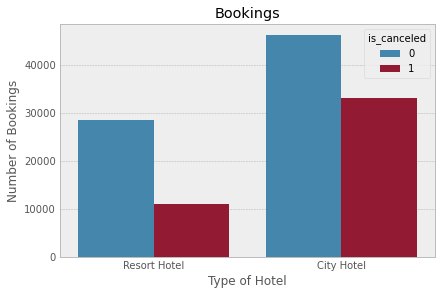

In [250]:
# Great! All values are unique in the country column
# Which type of hotel receives more bookings?
g = sns.countplot(data = hotel_df, x = 'hotel', hue = 'is_canceled')
g.set(title = "Bookings", xlabel = "Type of Hotel", ylabel = "Number of Bookings")
plt.show()

In [3]:
# It can be seen that the city hotel receives more bookings worldwide & there are more bookings compared to the canceled bookings
# Now which country had received the most bookings for each hotel type?
hotel_df_number = hotel_df.groupby(['hotel','country'])['hotel'].count().sort_values(ascending = False)
print(hotel_df_number.head(10))

hotel         country
City Hotel    PRT        30960
Resort Hotel  PRT        17630
City Hotel    FRA         8804
Resort Hotel  GBR         6814
City Hotel    DEU         6084
              GBR         5315
              ESP         4611
Resort Hotel  ESP         3957
City Hotel    ITA         3307
Resort Hotel  IRL         2166
Name: hotel, dtype: int64


In [13]:
hotel_df['country'] = hotel_df.country.astype('category')
hotel_df['hotel'] = hotel_df.hotel.astype('category')
table = pd.crosstab(hotel_df.country, hotel_df.hotel).sort_values(by=['City Hotel', 'Resort Hotel'], ascending=False)
print(table)

hotel    City Hotel  Resort Hotel
country                          
PRT           30960         17630
FRA            8804          1611
DEU            6084          1203
GBR            5315          6814
ESP            4611          3957
...             ...           ...
FJI               0             1
MDG               0             1
NPL               0             1
PLW               0             1
SMR               0             1

[177 rows x 2 columns]


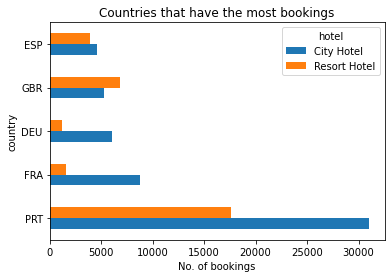

In [19]:
table = table.iloc[:5]
table.plot(kind='barh')
plt.xlabel('No. of bookings')
plt.title('Countries that have the most bookings')
plt.show()

In [34]:
# By far, Portugal had the most hotel bookings in both types of hotel 
# Let's see the trend of both types of hotel bookings in the second half of 2015 worldwide

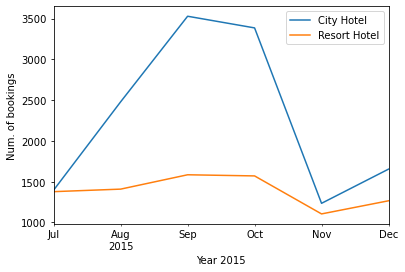

In [45]:
earliest_year_city = hotel_df[(hotel_df['Arrival Date'] < '2016-01-01') & (hotel_df['hotel'] == 'City Hotel')].sort_values(by='Arrival Date')
earliest_year_city.set_index('Arrival Date', inplace=True)
earliest_year_city = earliest_year_city.hotel.resample('M').count()

earliest_year_resort = hotel_df[(hotel_df['Arrival Date'] < '2016-01-01') & (hotel_df['hotel'] == 'Resort Hotel')].sort_values(by='Arrival Date')
earliest_year_resort.set_index('Arrival Date', inplace=True)
earliest_year_resort = earliest_year_resort.hotel.resample('M').count()

earliest_year = pd.concat([earliest_year_city, earliest_year_resort], axis='columns')
earliest_year.plot()
plt.xlabel('Year 2015')
plt.ylabel('Num. of bookings')
plt.legend(['City Hotel', 'Resort Hotel'], loc='upper right')
plt.show()

In [ ]:
# From the graph, it can be seen that there were similar trends of increase then decrease of hotel bookings for both types of hotel
# Let's see the trend of both types of hotel bookings in 2016 & in the first half of 2017 worldwide

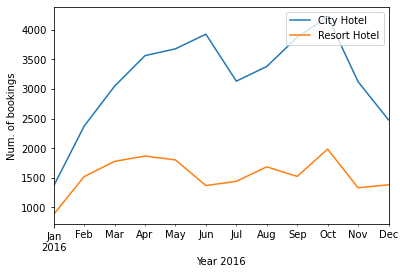

In [46]:
middle_year_city = hotel_df[(hotel_df['Arrival Date'] >= '2016-01-01') & (hotel_df['Arrival Date'] < '2017-01-01') & (hotel_df['hotel'] == 'City Hotel')].sort_values(by='Arrival Date')
middle_year_city.set_index('Arrival Date', inplace=True)
middle_year_city = middle_year_city.hotel.resample('M').count()

middle_year_resort = hotel_df[(hotel_df['Arrival Date'] >= '2016-01-01') & (hotel_df['Arrival Date'] < '2017-01-01') & (hotel_df['hotel'] == 'Resort Hotel')].sort_values(by='Arrival Date')
middle_year_resort.set_index('Arrival Date', inplace=True)
middle_year_resort = middle_year_resort.hotel.resample('M').count()

middle_year = pd.concat([middle_year_city, middle_year_resort], axis='columns')
middle_year.plot()
plt.xlabel('Year 2016')
plt.ylabel('Num. of bookings')
plt.legend(['City Hotel', 'Resort Hotel'], loc='upper right')
plt.show()

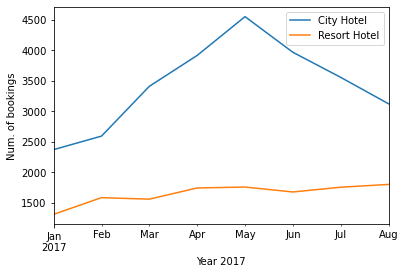

In [47]:
final_year_city = hotel_df[(hotel_df['Arrival Date'] >= '2017-01-01') & (hotel_df['hotel'] == 'City Hotel')].sort_values(by='Arrival Date')
final_year_city.set_index('Arrival Date', inplace=True)
final_year_city = final_year_city.hotel.resample('M').count()

final_year_resort = hotel_df[(hotel_df['Arrival Date'] >= '2017-01-01') & (hotel_df['hotel'] == 'Resort Hotel')].sort_values(by='Arrival Date')
final_year_resort.set_index('Arrival Date', inplace=True)
final_year_resort = final_year_resort.hotel.resample('M').count()

final_year = pd.concat([final_year_city, final_year_resort], axis='columns')
final_year.plot()
plt.xlabel('Year 2017')
plt.ylabel('Num. of bookings')
plt.legend(['City Hotel', 'Resort Hotel'], loc='upper right')
plt.show()

In [60]:
# Based on the 2015 & 2016 graphs, the similar trends of the hotel bookings for both hotel types indicate that the hotel demands didn't affected by the hotel types
# However, approaching the second half of 2017, the trends of the hotel bookings for both hotel types were different. The demands for city hotels decreases eventually but not with the demands for resort hotels.
# Notice that the number of hotel bookings were dropped at the start, middle and end of each year (festive seasons). The possible answer might be because of most of these bookings in the dataset were made for business/work purposes in which there were few people would spend their time away from home during festive seasons.
# Let's see if that was the possible case
# Checking the email address used for booking the hotel could indicate whether most of the guests stayed for business/work purposes or not

In [87]:
personal_email = hotel_df[(hotel_df.email.str[-10:] == '@gmail.com') | (hotel_df.email.str[-10:] == '@yahoo.com')]
personal_email = personal_email['email']

professional_email = hotel_df[~((hotel_df.email.str[-10:] == '@gmail.com') | (hotel_df.email.str[-10:] == '@yahoo.com'))]
professional_email = professional_email['email']

print('Number of personal email used: ' + str(personal_email.count()))
print('Number of professional email used: ' + str(professional_email.count()))
print('Total number of email used: ' + str(hotel_df.email.count()))
print('Percentage of professional email used: ' + str(round(professional_email.count() / hotel_df.email.count(), 2)) + str('%'))

Number of personal email used: 18499
Number of professional email used: 100891
Total number of email used: 119390
Percentage of professional email used: 0.85%


In [86]:
# There was a total of 85% of all email addresses were used by professional addresses. Hence, the previous hypothesis might be possible for the drops of hotel bookings during festive seasons